In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("proj1.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

(2340, 4160, 3)


(2340, 4160)
1.0


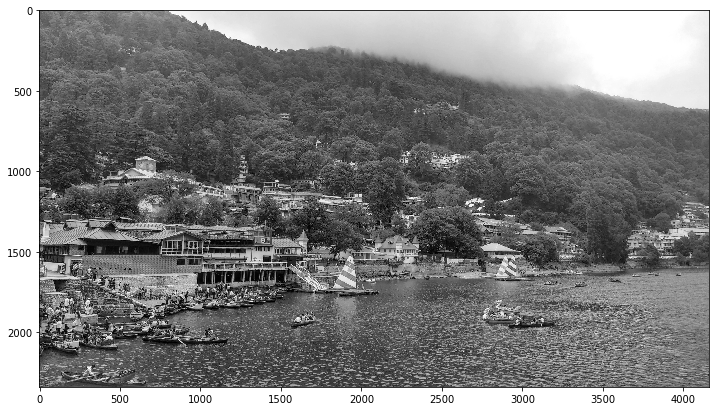

In [2]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

Number of components explaining 95% variance: 204


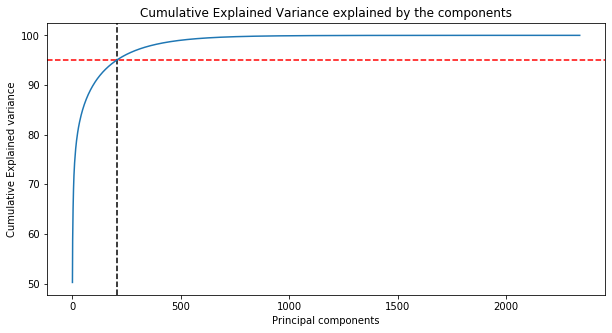

In [3]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)


In [6]:
ipca = IncrementalPCA(n_components=k)
img=ipca.fit_transform(image_bw)
print(img.shape)

(2340, 204)


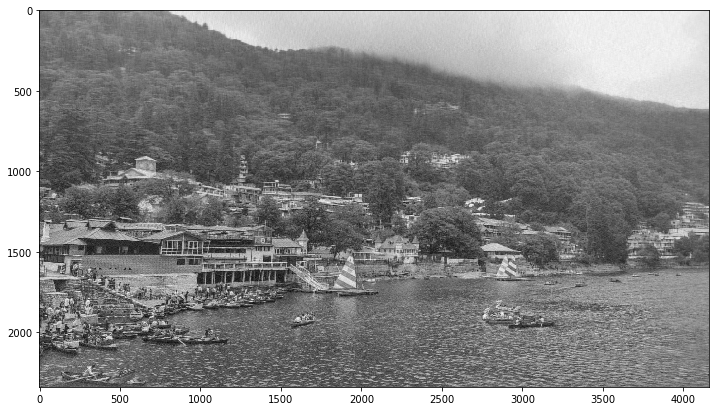

In [7]:
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

In [9]:
import imageio
imageio.imwrite('proj1_recon_204.jpg',image_recon)

Lossy conversion from float64 to uint8. Range [-0.14778281422441447, 1.0843861324289055]. Convert image to uint8 prior to saving to suppress this warning.


(2340, 100)


Lossy conversion from float64 to uint8. Range [-0.165195981648405, 1.0821681432293233]. Convert image to uint8 prior to saving to suppress this warning.


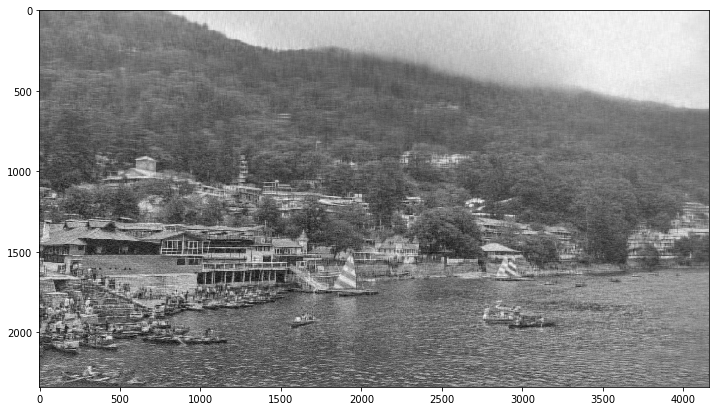

In [15]:
ipca = IncrementalPCA(n_components=100)
img=ipca.fit_transform(image_bw)
print(img.shape)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)
imageio.imwrite('proj1_recon_100.jpg',image_recon)